# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Problema -> algoritmo de clasificación que ayude a predecir si un cliente contratará o no un depósito a largo plazo.

#EDA
# 1. Cargar conjunto de datos
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
total_data.shape

(41188, 21)

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
AssertionError#   Eliminación de información irrelevante 
total_data.drop(["nr.employed"], axis = 1, inplace = True)
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no


In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

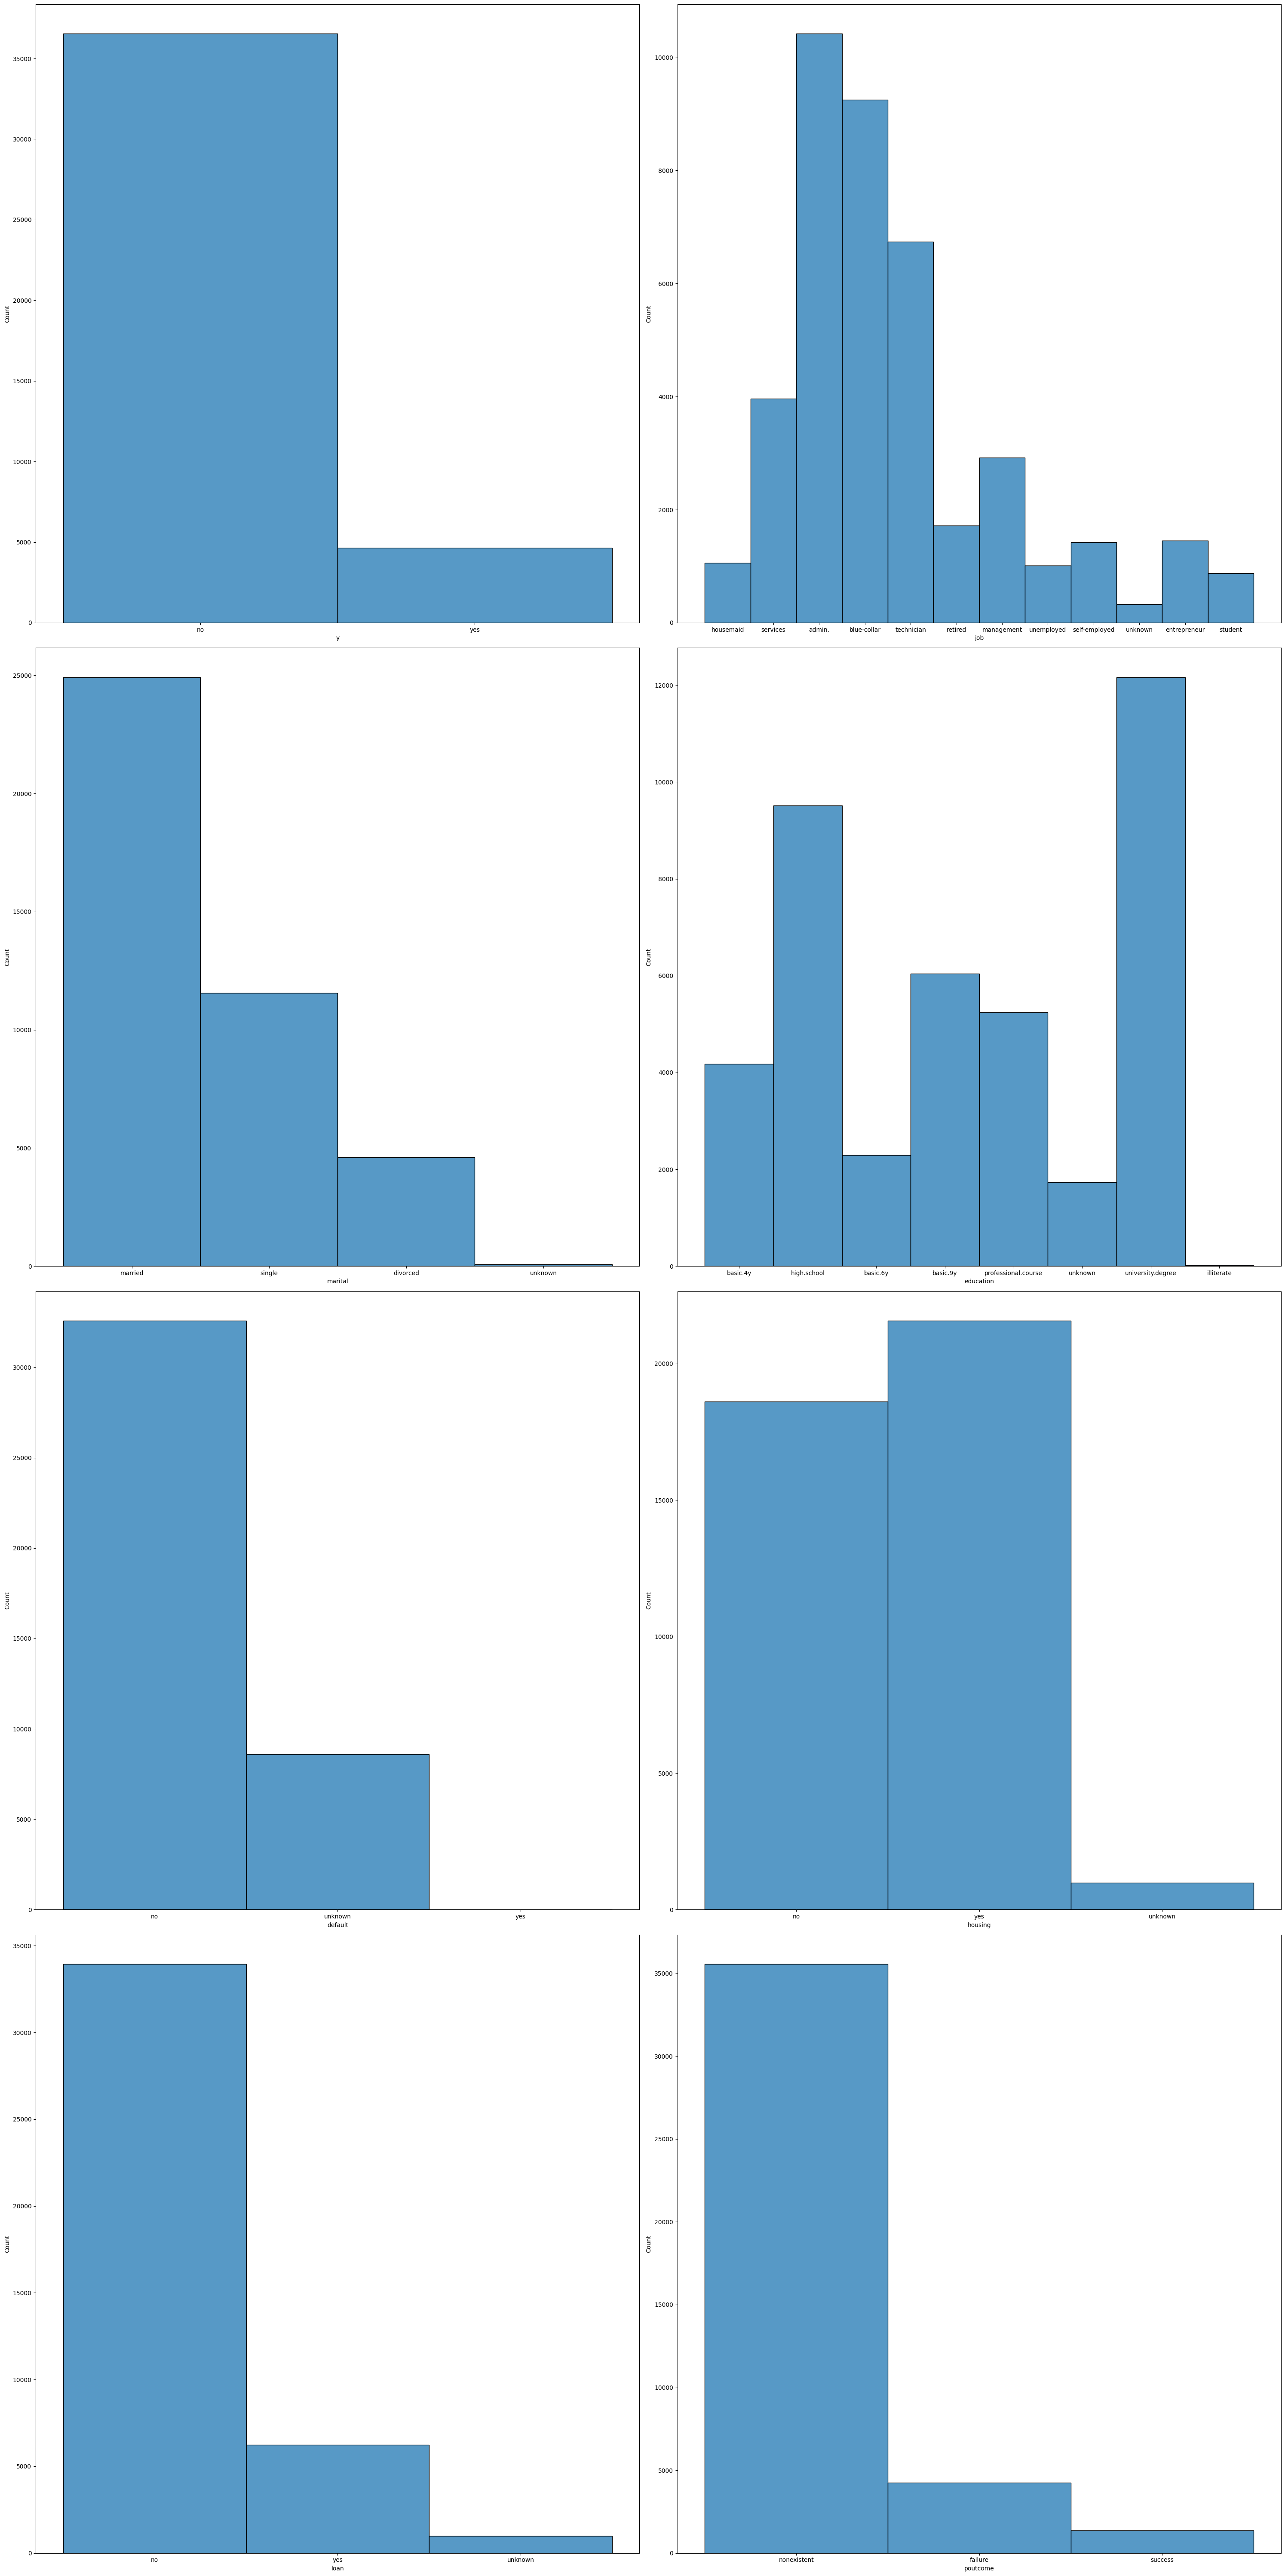

In [7]:
# 3. Análisis de variables univariante


#   Variables categóricas -> histogramas
fig, axis = plt.subplots(4, 2, figsize = (30, 60))

sns.histplot(ax = axis[0][0], data = total_data, x = "y")
sns.histplot(ax = axis[0][1], data = total_data, x = "job")
sns.histplot(ax = axis[1][0], data = total_data, x = "marital")
sns.histplot(ax = axis[1][1], data = total_data, x = "education")
sns.histplot(ax = axis[2][0], data = total_data, x = "default")
sns.histplot(ax = axis[2][1], data = total_data, x = "housing")
sns.histplot(ax = axis[3][0], data = total_data, x = "loan")
sns.histplot(ax = axis[3][1], data = total_data, x = "poutcome")

plt.tight_layout()

# Mostrar el plot
plt.show()

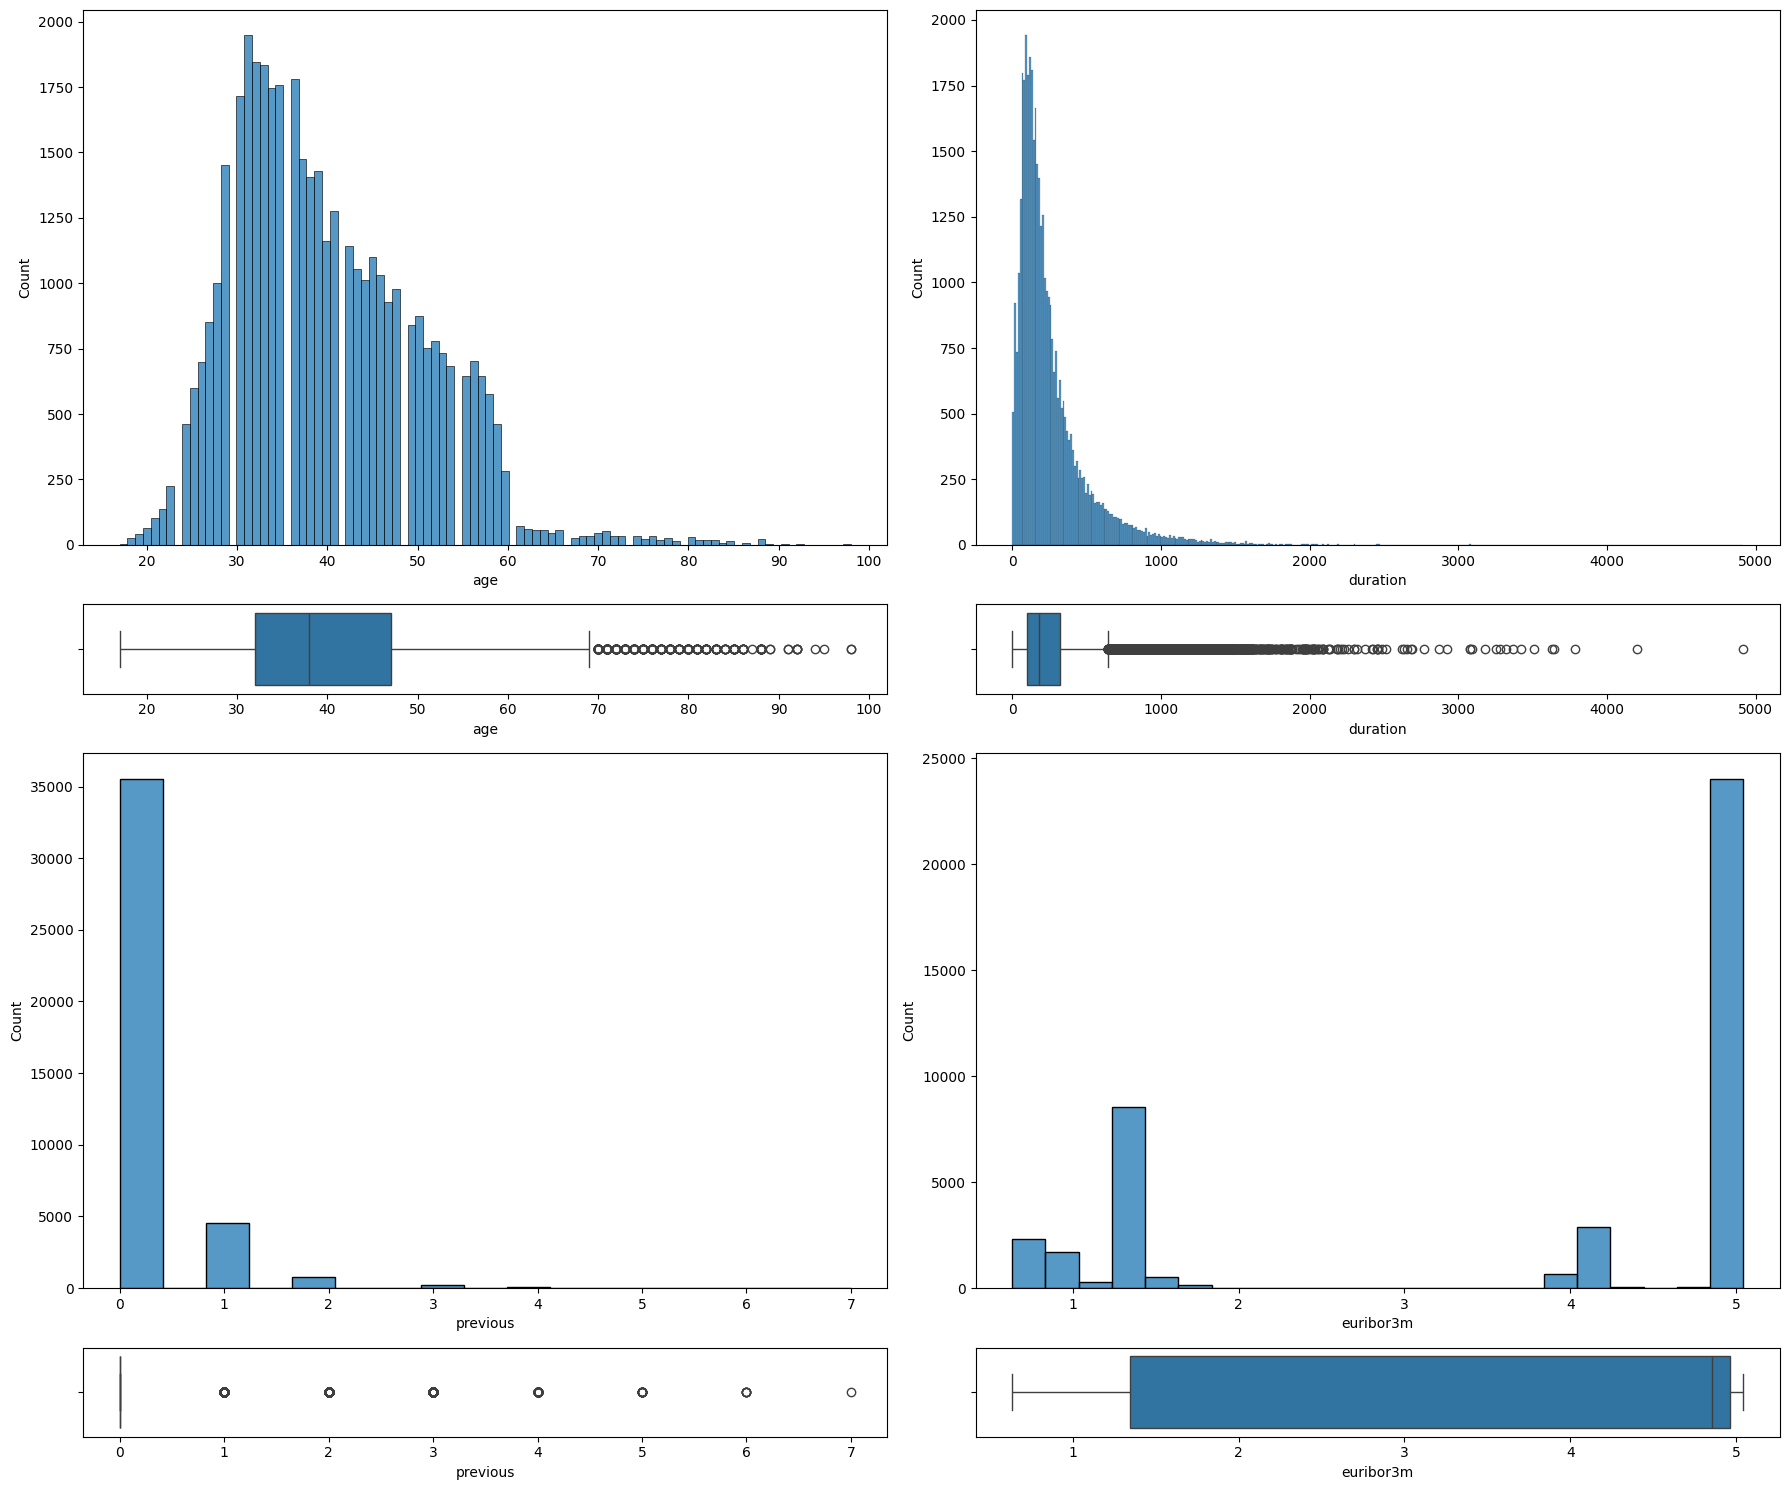

In [8]:
# Variables numéricas
fig, axis = plt.subplots(4, 2, figsize = (18, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "age") 
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")
sns.histplot(ax = axis[0, 1], data = total_data, x = "duration") 
sns.boxplot(ax = axis[1, 1], data = total_data, x = "duration")
sns.histplot(ax = axis[2, 0], data = total_data, x = "previous") 
sns.boxplot(ax = axis[3, 0], data = total_data, x = "previous")
sns.histplot(ax = axis[2, 1], data = total_data, x = "euribor3m") 
sns.boxplot(ax = axis[3, 1], data = total_data, x = "euribor3m")

plt.tight_layout()

plt.show()

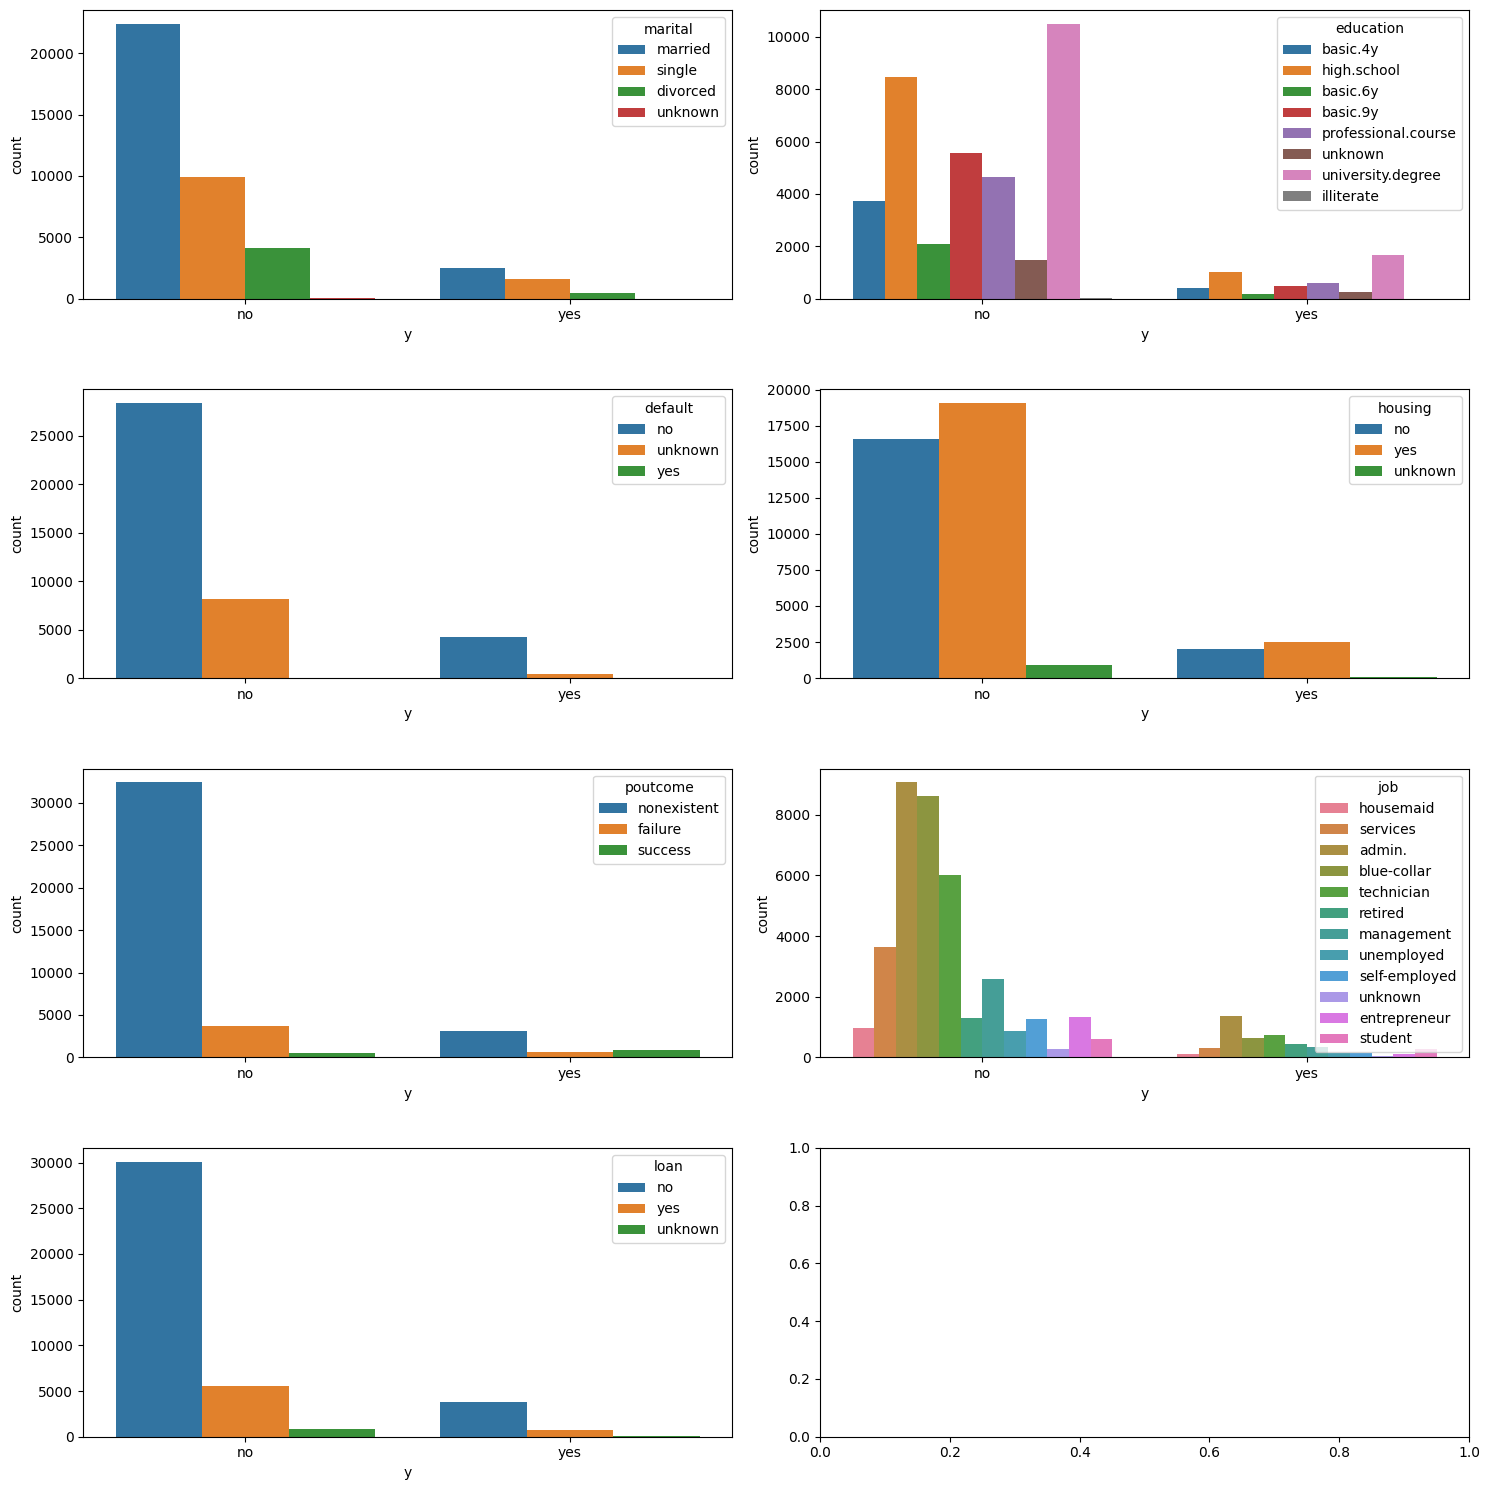

In [9]:
# 4. Análisis de variables multivariante
#   Categórico-categórico
fig, axis = plt.subplots(4, 2, figsize = (15, 15))


# Crear el gráfico countplot
# Crear un diagrama de dispersión múltiple
sns.countplot(ax = axis[0][0], data = total_data, x = "y", hue = "marital")
sns.countplot(ax = axis[0][1], data = total_data, x = "y", hue = "education")
sns.countplot(ax = axis[1][0], data = total_data, x = "y", hue = "default")
sns.countplot(ax = axis[1][1], data = total_data, x = "y", hue = "housing")
sns.countplot(ax = axis[2][0], data = total_data, x = "y", hue = "poutcome")
sns.countplot(ax = axis[2][1], data = total_data, x = "y", hue = "job")
sns.countplot(ax = axis[3][0], data = total_data, x = "y", hue = "loan")
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

<Axes: >

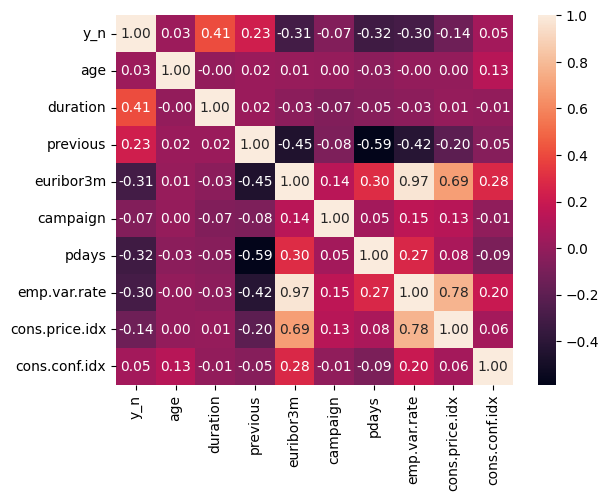

In [10]:
#   Análisis de correlaciones
total_data["y_n"] = pd.factorize(total_data["y"])[0]

sns.heatmap(total_data[["y_n", "age", "duration", "previous", "euribor3m", "campaign", "pdays", "emp.var.rate", "cons.price.idx", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f")

<Axes: >

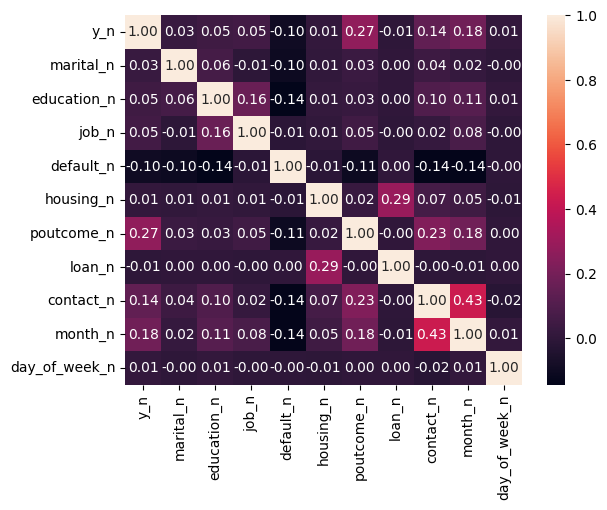

In [11]:
#   Análisis de correlaciones
total_data["job_n"] = pd.factorize(total_data["job"])[0]
total_data["marital_n"] = pd.factorize(total_data["marital"])[0]
total_data["education_n"] = pd.factorize(total_data["education"])[0]
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data["poutcome_n"] = pd.factorize(total_data["poutcome"])[0]
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
total_data["contact_n"] = pd.factorize(total_data["contact"])[0]
total_data["month_n"] = pd.factorize(total_data["month"])[0]
total_data["day_of_week_n"] = pd.factorize(total_data["day_of_week"])[0]

sns.heatmap(total_data[["y_n", "marital_n", "education_n", "job_n", "default_n", "housing_n", "poutcome_n", "loan_n", "contact_n", "month_n", "day_of_week_n"]].corr(), annot = True, fmt = ".2f")

<Axes: >

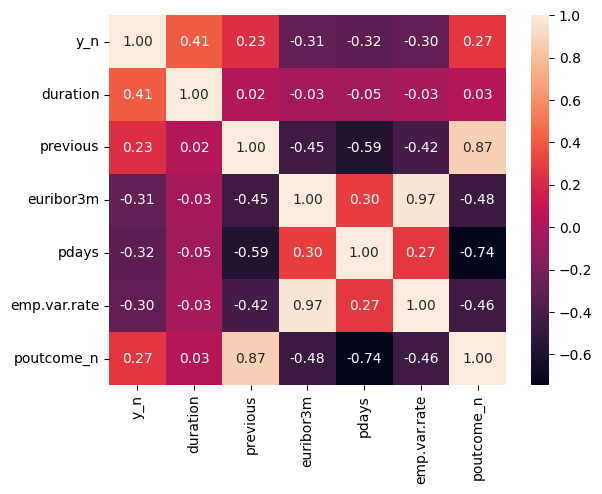

In [12]:
sns.heatmap(total_data[["y_n", "duration", "previous", "euribor3m", "pdays", "emp.var.rate", "poutcome_n"]].corr(), annot = True, fmt = ".2f")

In [13]:
total_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y_n,job_n,marital_n,education_n,default_n,housing_n,poutcome_n,loan_n,contact_n,month_n,day_of_week_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,0.112663,3.673863,0.510637,3.277370,0.208908,0.571959,0.169953,0.199825,0.634714,2.249951,1.979600
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,0.316184,2.454340,0.696794,2.185558,0.406713,0.541216,0.455811,0.456055,0.481516,2.429157,1.411539
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,0.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,0.000000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,1.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000


In [14]:
total_data.isnull().sum().sort_values(ascending=False)

age               0
cons.price.idx    0
month_n           0
contact_n         0
loan_n            0
poutcome_n        0
housing_n         0
default_n         0
education_n       0
marital_n         0
job_n             0
y_n               0
y                 0
euribor3m         0
cons.conf.idx     0
emp.var.rate      0
job               0
poutcome          0
previous          0
pdays             0
campaign          0
duration          0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
day_of_week_n     0
dtype: int64

In [15]:
#   Escalado de valores
# División del conjunto en train y test
from sklearn.model_selection import train_test_split

# El precio se ha deducido que sólo guarda relación con el tipo de habitación y más débilmente con el barrio
num_variables = ["duration", "pdays","euribor3m","emp.var.rate","poutcome_n"]

# Dividimos el conjunto de datos en muestras de train y test
X = total_data.drop("y_n", axis = 1)[num_variables]
y = total_data["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,duration,pdays,euribor3m,emp.var.rate,poutcome_n
12348,286,999,4.959,1.4,0
8565,178,999,4.864,1.4,0
21424,103,999,4.963,1.4,0
3316,135,999,4.860,1.1,0
33246,418,999,1.291,-1.8,0


In [16]:
y_train.head()

12348    0
8565     0
21424    0
3316     0
33246    0
Name: y_n, dtype: int64

In [17]:
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()'''

,duration,pdays,euribor3m,emp.var.rate,poutcome_n
12348,0.112453,0.195697,0.771196,0.838815,-0.371649
8565,-0.305973,0.195697,0.716413,0.838815,-0.371649
21424,-0.596546,0.195697,0.773502,0.838815,-0.371649
3316,-0.472568,0.195697,0.714107,0.647683,-0.371649
33246,0.623862,0.195697,-1.343979,-1.199927,-0.371649


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,duration,pdays,euribor3m,emp.var.rate,poutcome_n
12348,0.058154,1.0,0.980503,1.000000,0.0
8565,0.036194,1.0,0.958966,1.000000,0.0
21424,0.020943,1.0,0.981410,1.000000,0.0
3316,0.027450,1.0,0.958059,0.937500,0.0
33246,0.084994,1.0,0.148946,0.333333,0.0


In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scal, y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(X_test_scal)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.901287032540068

In [35]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.6536964980544747

In [36]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.34603501544799176

In [37]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.45252525252525255

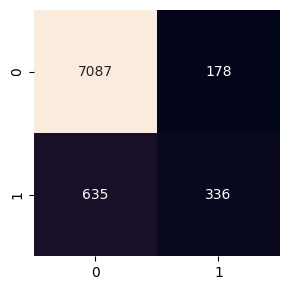

In [38]:
from sklearn.metrics import confusion_matrix

banco_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(banco_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [51]:
import numpy as np
# Optimización con hiperparámetros
# Búsqueda por malla

'''from sklearn.model_selection import GridSearchCV

# Definimos los parámetros a mano que queremos ajustar
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid'''

# Busqueda aleatoria
from sklearn.model_selection import RandomizedSearchCV

# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [52]:
random_search.fit(X_train_scal, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

Mejores hiperparámetros: {'solver': 'sag', 'penalty': 'l2', 'C': 29.763514416313132}


In [53]:
model_random_search = LogisticRegression(penalty = "l2", C = 29.763514416313132, solver = "sag")
model_random_search.fit(X_train_scal, y_train)
y_pred = model_random_search.predict(X_test_scal)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.9021369596891695

In [54]:
precision_score(y_test, y_pred)

0.6502732240437158

In [55]:
recall_score(y_test, y_pred)

0.36766220391349125

In [56]:
f1_score(y_test, y_pred)

0.4697368421052632

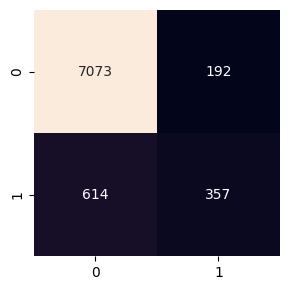

In [57]:
banco_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(banco_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [40]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_scal, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [41]:
model_grid = LogisticRegression(penalty = "l2", C = 100, solver = "newton-cg")
model_grid.fit(X_train_scal, y_train)
y_pred = model_grid.predict(X_test_scal)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9022583778533269

In [42]:
precision_score(y_test, y_pred)

0.652014652014652

In [43]:
recall_score(y_test, y_pred)

0.3666323377960865

In [44]:
f1_score(y_test, y_pred)

0.4693473961766645

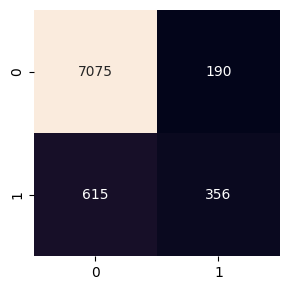

In [45]:
banco_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(banco_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()